In [1]:
# Simple neural network

In [2]:
import numpy as np
import math

In [3]:
class NeuronNetworkLayer:
  # Initializer / Instance Attributes
  def __init__(self, num_input, num_output,activation, initial_gain):
      np.random.seed(42)
      self.inputs = []
      self.outputs = []
      self.weights = np.random.rand(num_output, num_input)*initial_gain
      self.bias = np.random.rand(num_output)* initial_gain
      self.activation = activation

  def prep_arr(self , arr):
    arr = np.array(arr)
    if arr.ndim == 1:
      arr = np.reshape(arr , (1 , -1))

    return arr

  def sigmoid(self, x):
    # caculate and return output
    e = math.e
    output = 1/(1+e**(-x))
    
    return output

  def relu(self, x):
    # caculate and return output
    output = np.maximum(x , 0)

    return output
  
  def forward(self, input):
    # calculate forward propagation of layer then store in and return self.outputs

    self.inputs = self.prep_arr(input)
    self.weights = self.prep_arr(self.weights)

    #Develop Hypothesis
    h = np.dot(self.inputs , self.weights.T) + self.bias

    #Choose function to apply
    if self.activation == "sigmoid":
      self.outputs = self.sigmoid(h)
    elif self.activation == "relu":
      self.outputs = self.relu(h)
    elif self.activation == "linear":
      self.outputs = h
    else:
      print("No function of " , self.activation)
    return self.outputs


  def backprop(self, incoming_gradients, learning_rate):
    # Calculate gradient of Loss with respect to weights, biases and inputs.
    # Use the gradients to update the weights and biases.
    # Return the input_gradients for use in the next layer.
    
    #Preparation and Validation
    incoming_gradients = self.prep_arr(incoming_gradients)

    #Choose Derivative
    if self.activation == "sigmoid":
      d_act = np.multiply(self.outputs , (1 - self.outputs))
    elif self.activation == "relu":
      d_act = np.where(self.outputs > 0 , 1 , 0)
    elif self.activation == "linear":
      d_act = np.ones_like(self.outputs)
    #print(f"{self.activation} d_act: {d_act}")

    if self.activation == "linear":
      derivative = incoming_gradients * d_act
    else:
      derivative = np.multiply(incoming_gradients , d_act)

    #Calculate input gradient
    input_gradients = np.dot(derivative , self.weights)

    #Updating Weight and Bias
    weight_gradients = np.dot(self.inputs.T , derivative)
    
    self.weights = self.weights - (learning_rate * weight_gradients).T
    self.bias = self.bias - learning_rate * np.sum(derivative , axis=0)
    
    return input_gradients

In [4]:
class NeuralNetwork:
  def __init__(self):
      self.layers = []
      self.output = None

  def add_layer(self, nn_layer):
    # Add layer to neural network
    self.layers.append(nn_layer)
    

  def forward(self, input):
    # Do forward propagation through entire neural network
    # Calculate and return the final layer_output
    # layer_output = self.layers[0].forward(input)
    # for i in range(1 , len(self.layers)):
    #   layer_output = self.layers[i].forward(layer_output)
    layer_output = input
    for layer in self.layers:
      layer_output = layer.forward(layer_output)
      
    return layer_output

  def loss(self, output, target):
    # Calculate and return MSE loss
    loss = np.mean((target - output)**2)

    return loss

  def loss_derivative(self, output, target):
    # Calculate and return derivative of MSE loss
    dLoss = output - target
    
    return dLoss

  def backward(self, dLoss, learning_rate):
    # Perform backpropagtion though entire neural network
    # Return the input_gradients in the last layer
    #Initialize Last Layer
    # input_gradients = self.layers[-1].backprop(dLoss , learning_rate)
    # for i in range(len(self.layers) - 2 , -1 , -1):

    #   input_gradients = self.layers[i].backprop(input_gradients , learning_rate)
    input_gradients = dLoss
    for layer in reversed(self.layers):
      input_gradients = layer.backprop(input_gradients , learning_rate)

    return input_gradients

  def train(self, iterations, train_x, train_y, learning_rate, print_every):
    # Train the neural network
    
    for i in range(iterations):
      
      #Training Process
      total_loss=0
      for row_x, row_y in zip(train_x, train_y):
        #print('row_x', row_x)
        #print('row_y', row_y)

        output = self.forward(row_x)
        d_loss = self.loss_derivative(output, row_y)
        self.backward(d_loss, learning_rate)

        loss = self.loss(output, row_y)
        total_loss = total_loss + loss

      if i%print_every==0:
        print(f'total_loss at iteration {i}', np.sum(total_loss))
        
    return total_loss


## Section 1: Neural Network Algorithm Run Through

In [5]:
# You have one row of input with two columns. You can think of as column A and column B.
# Here column A=1 and column B=0
input = np.array([1,0])

In [6]:
layer1 = NeuronNetworkLayer(2,5, 'sigmoid', 0.01)

In [7]:
layer1_bias = layer1.bias
layer1_bias

array([0.00020584, 0.0096991 , 0.00832443, 0.00212339, 0.00181825])

In [8]:
assert np.allclose( layer1_bias, np.array([0.00020584, 0.0096991 , 0.00832443, 0.00212339, 0.00181825]) )

In [9]:
layer1_weights = layer1.weights
layer1_weights

array([[0.0037454 , 0.00950714],
       [0.00731994, 0.00598658],
       [0.00156019, 0.00155995],
       [0.00058084, 0.00866176],
       [0.00601115, 0.00708073]])

In [10]:
assert np.allclose( layer1_weights, np.array([[0.0037454 , 0.00950714],[0.00731994, 0.00598658],[0.00156019, 0.00155995],[0.00058084, 0.00866176],[0.00601115, 0.00708073]]) )

In [11]:
layer1_forward = layer1.forward(input)
layer1_forward

array([[0.50098781, 0.50425466, 0.50247113, 0.50067606, 0.50195734]])

In [12]:
assert np.allclose( layer1_forward, np.array([0.50098781, 0.50425466, 0.50247113, 0.50067606, 0.50195734]) )

In [13]:
# let's build a neural network with 3 layers

In [14]:
layer1 = NeuronNetworkLayer(2,5, 'relu', 0.01)
layer2 = NeuronNetworkLayer(5,10, 'relu', 0.01)
layer3 = NeuronNetworkLayer(10,1, 'relu', 0.01)

In [15]:
output1 = layer1.forward(input)
output2 = layer2.forward(output1)
output3 = layer3.forward(output2)
output3

array([[0.00051439]])

In [16]:
assert np.allclose(output3 , np.array([0.00051439]))

In [17]:
# Now let's find the error and error gradient

def cal_derivative_and_loss(output3,target):
  final_output = output3[0]
  loss = (target - final_output)**2
  dLoss = final_output-target
  return loss, dLoss

In [18]:
loss, dLoss = cal_derivative_and_loss(output3,1)

In [19]:
loss

array([0.99897149])

In [20]:
dLoss

array([-0.99948561])

In [21]:
assert np.allclose( loss, 0.9989714888495282)
assert np.allclose( dLoss, -0.9994856121273223)

In [22]:
# Now let's start backprop on the layers

In [23]:
input_gradients3 = layer3.backprop(dLoss, 0.1)
input_gradients3

array([[-0.00374347, -0.00950225, -0.00731617, -0.00598351, -0.00155938,
        -0.00155914, -0.00058054, -0.00865731, -0.00600806, -0.00707708]])

In [24]:
assert np.allclose( input_gradients3, np.array([-0.00374347, -0.00950225, -0.00731617, -0.00598351, -0.00155938,
       -0.00155914, -0.00058054, -0.00865731, -0.00600806, -0.00707708]))

In [25]:
input_gradients2 = layer2.backprop(input_gradients3, 0.1)
input_gradients2

array([[-0.00019084, -0.00021473, -0.00026229, -0.00029393, -0.00018403]])

In [26]:
assert np.allclose( input_gradients2, np.array([-0.00019084, -0.00021473, -0.00026229, -0.00029393, -0.00018403]))

In [27]:
input_gradients1 = layer1.backprop(input_gradients2, 0.1)
input_gradients1

array([[-3.97277662e-06, -7.35800919e-06]])

In [28]:
assert np.allclose( input_gradients1, np.array([-3.98009953e-06, -7.36642273e-06] ))

## Section 2: Build the Neural Network Class.

In [29]:
nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(2,5, 'sigmoid', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(5,10, 'sigmoid', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(10, 1, 'sigmoid', 0.01) )

In [30]:
input = np.array([1,0])
target = np.array([1])

In [31]:
forward_result = nn_model.forward(input)
forward_result

array([[0.50660746]])

In [32]:
assert np.allclose( forward_result, np.array([0.50660746]) )

In [33]:
loss = nn_model.loss(forward_result, target)
loss

0.24343619827363822

In [34]:
loss_derivative = nn_model.loss_derivative(forward_result, target)
loss_derivative

array([[-0.49339254]])

In [35]:
assert np.allclose(loss, np.array([0.2434362]) )
assert np.allclose(loss_derivative, np.array([-0.49339254]) )

In [36]:
backward_result = nn_model.backward(loss_derivative,0.1)
backward_result

array([[-3.06340704e-08, -5.67389248e-08]])

In [37]:
assert np.allclose(backward_result, np.array([-3.06340704e-08, -5.67389248e-08]))

In [38]:
train_x = np.array( [[1,1]] )
train_y = np.array([[1]] )

total_loss = nn_model.train(10,train_x, train_y, 0.1, 1)

total_loss at iteration 0 0.23278358174415567
total_loss at iteration 1 0.22262202387316252
total_loss at iteration 2 0.21294412619571323
total_loss at iteration 3 0.20373945755988393
total_loss at iteration 4 0.19499513152988138
total_loss at iteration 5 0.18669632207229045
total_loss at iteration 6 0.17882673659198378
total_loss at iteration 7 0.1713690397866621
total_loss at iteration 8 0.16430522529255934
total_loss at iteration 9 0.15761693488389558


In [39]:
assert total_loss < 0.2

## Section 3: Let's Model Some Logic Gates

In [40]:
# Let's train an AND Gate

In [41]:
nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(2,5, 'sigmoid', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(5,10, 'sigmoid', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(10, 1, 'sigmoid', 0.01) )

In [42]:
train_x = np.array([ [1,1], [1,0], [0,1], [0,0]])
train_y = np.array([[1], [0], [0], [0] ])

total_loss = nn_model.train(2000,train_x, train_y, 0.5, 500)

total_loss at iteration 0 1.0060940031829388
total_loss at iteration 500 0.7800871908607746
total_loss at iteration 1000 0.65788899711266
total_loss at iteration 1500 0.031246444457946863


In [43]:
assert total_loss < 0.01

In [44]:
# for AND gate an input of [1,1] should give output of 1
nn_model.forward(np.array([1,1]))

array([[0.93399522]])

In [45]:
assert nn_model.forward(np.array([1,1])) > 0.9

In [46]:
# for AND gate an input of [1,0] should give output of 0
nn_model.forward(np.array([1,0]))

array([[0.03395968]])

In [47]:
assert nn_model.forward(np.array([1,0])) < 0.1

In [48]:
# for AND gate an input of [0,1] should give output of 0
nn_model.forward(np.array([0,1]))

array([[0.03426685]])

In [49]:
assert nn_model.forward(np.array([0,1])) < 0.1

In [50]:
nn_model.forward(np.array([0,0]))

array([[0.00019878]])

In [51]:
assert nn_model.forward(np.array([0,0])) < 0.1

In [52]:
# Let's train an OR Gate and let's make it harder for the model by asking it to predict 0.69

In [53]:
nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(2,5, 'relu', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(5,10, 'relu', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(10, 2, 'linear', 0.01) )

In [54]:
# nn_model.test(np.array([1,0]))

train_x = np.array([ [1,1], [1,0], [0,1], [0,0]])
train_y = np.array([[1,0.69], [1,0.69], [1,0.69], [0,0.69] ])

total_loss = nn_model.train(4000,train_x, train_y, 0.1, 500)

total_loss at iteration 0 1.965005841430646
total_loss at iteration 500 0.4144686014599397
total_loss at iteration 1000 0.17610887651186521
total_loss at iteration 1500 0.17517429222565045
total_loss at iteration 2000 0.17495781930725388
total_loss at iteration 2500 0.176083755562214
total_loss at iteration 3000 0.17516258506131063
total_loss at iteration 3500 0.1754010310505248


In [55]:
total_loss

0.17512677194724496

In [56]:
assert total_loss < 0.3

In [57]:
nn_model.forward(np.array([1,1]))

array([[1.27422775, 0.69000741]])

In [58]:
nn_model.forward(np.array([1,0]))

array([[0.80259664, 0.68999473]])

In [59]:
nn_model.forward(np.array([0,1]))

array([[0.74142541, 0.68999268]])

In [60]:
nn_model.forward(np.array([0,0]))

array([[0.28216447, 0.69001701]])

In [61]:
assert nn_model.forward(np.array([1,1]))[0][0] > 0.7
assert nn_model.forward(np.array([1,0]))[0][0] > 0.7
assert nn_model.forward(np.array([0,1]))[0][0] > 0.7
assert nn_model.forward(np.array([0,0]))[0][0] < 0.3

assert np.allclose( nn_model.forward(np.array([1,1]))[0][1], 0.69, rtol=1e-03, atol=1e-03, equal_nan=False)
assert np.allclose( nn_model.forward(np.array([1,0]))[0][1], 0.69, rtol=1e-03, atol=1e-03, equal_nan=False)
assert np.allclose( nn_model.forward(np.array([0,1]))[0][1], 0.69, rtol=1e-03, atol=1e-03, equal_nan=False)
assert np.allclose( nn_model.forward(np.array([0,0]))[0][1], 0.69, rtol=1e-03, atol=1e-03, equal_nan=False)


## Section 4: Linear Regression Prediction with Some Test Lines

In [62]:
import matplotlib.pyplot as plt

def plotXY(x1,y1,x2,y2):
  # Create the plot
  plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size

  # Plot the first line
  plt.plot(x1, y1, label='Line 1', color='blue', linestyle='-', marker='o')

  # Plot the second line
  plt.plot(x2, y2, label='Line 2', color='red', linestyle='--', marker='x')

  # Adding title
  plt.title('X-Y Plot with Two Lines')

  # Adding X and Y axis labels
  plt.xlabel('X axis label')
  plt.ylabel('Y axis label')

  # Adding a legend
  plt.legend()

  # Show plot
  plt.show()

In [63]:
# Let's train a straight line.

In [64]:
# TO DO: Build the neural network

nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(1,15, 'sigmoid', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(15,15, 'sigmoid', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(15, 1, 'linear', 0.01) )

In [65]:
train_x = np.linspace(-10, 10, 20)
train_y = train_x*2+3

train_x = np.array([[item] for item in train_x])
train_y = np.array([[item] for item in train_y])

# TO DO: Train the model.
total_loss = nn_model.train(4000 , train_x , train_y , 0.01 , 500)

total_loss at iteration 0 2825.896819452619
total_loss at iteration 500 62.26251940759384
total_loss at iteration 1000 12.80149018411413
total_loss at iteration 1500 7.1574673009818435


total_loss at iteration 2000 2.179002760425538
total_loss at iteration 2500 1.482564862657354
total_loss at iteration 3000 1.2486137548571103
total_loss at iteration 3500 1.0844504050156074


In [66]:
total_loss

0.9228164077024915

In [67]:
assert total_loss < 10

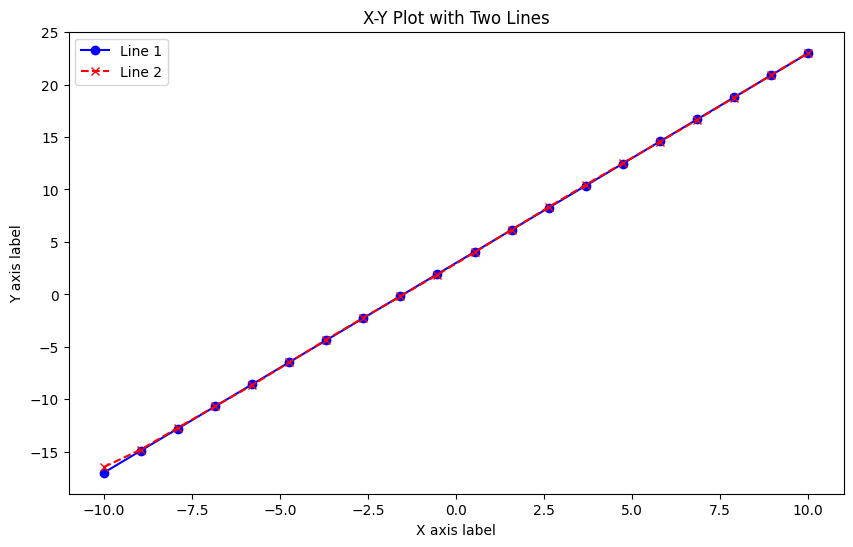

In [68]:
forward_result = []
for x in train_x:
  forward = nn_model.forward(x)
  forward_result.append(np.squeeze(forward))

plotXY(train_x, train_y, train_x, forward_result )

In [69]:
# Let's train a second order polynomial

In [70]:
# TO DO: Build the neural network

nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(1 , 30 , 'sigmoid', 1) )
nn_model.add_layer(NeuronNetworkLayer(30 , 30 , 'sigmoid', 1) )
nn_model.add_layer(NeuronNetworkLayer(30 , 1 , 'linear', 1) )

In [71]:
train_x = np.linspace(-10, 10, 40)
train_y = train_x*train_x*2+3*train_x+3

train_x = np.array([[item] for item in train_x])
train_y = np.array([[item] for item in train_y])

# TO DO: Train the model.
total_loss = nn_model.train(50000 , train_x , train_y , 0.00001 , 10000)

total_loss at iteration 0 310698.50385796407


total_loss at iteration 10000 92146.05771054294
total_loss at iteration 20000 530.3972062659184
total_loss at iteration 30000 112.23901108656926
total_loss at iteration 40000 48.63818219413153


In [72]:
assert total_loss < 400

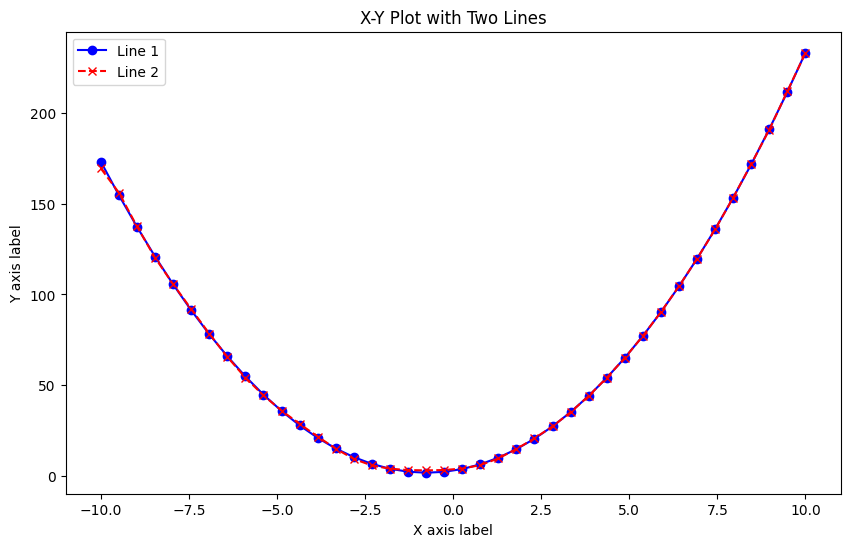

In [73]:
train_x_prediction = []
for x in train_x:
  forward_result = nn_model.forward(x)
  train_x_prediction.append(np.squeeze(forward_result))

train_x_prediction

plotXY(train_x, train_y, train_x, train_x_prediction )

## Section 5: Test with Iris Dataset

In [74]:
# Now let's do the iris datset

In [75]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
species_mapping = dict(zip(range(3), iris.target_names))
iris_df['species'] = iris_df['species'].map(species_mapping)

In [76]:
# One-hot encode the 'species' column
species_encoded = pd.get_dummies(iris_df['species'], prefix='species')

iris_df_encoded = pd.concat([iris_df.drop('species', axis=1), species_encoded], axis=1)

train_y = species_encoded.to_numpy()

In [77]:
iris_df_encoded.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [78]:
df_x = iris_df_encoded.drop(['species_setosa', 'species_versicolor', 'species_virginica'], axis=1).to_numpy()
df_y = iris_df_encoded[['species_setosa', 'species_versicolor', 'species_virginica']].to_numpy()

In [79]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

In [80]:
train_x.shape

(105, 4)

In [81]:
train_y.shape

(105, 3)

In [82]:
# TO DO: Create your neural network by completing the code in this cell

nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(4,15, 'relu', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(15,15, 'relu', 0.01) )
nn_model.add_layer(NeuronNetworkLayer(15, 3, 'sigmoid', 0.01) )

In [83]:
# TO DO: Train the model.
total_loss = nn_model.train(10000 , train_x , train_y , 0.001 , 2000)

total_loss at iteration 0 26.283118096078738


total_loss at iteration 2000 12.455678655665082
total_loss at iteration 4000 2.24484553580151
total_loss at iteration 6000 1.660590060196995


In [ ]:
assert total_loss < 5

In [ ]:
def prediction_accuracy(nn_model, train_x, train_y):

  correct=0
  for i in range(len(train_x)):
    prediction = nn_model.forward(train_x[i])
    prediction_index = np.argmax(prediction)
    y_label = np.argmax(train_y[i])
    if y_label == prediction_index:
      correct=correct+1

  return correct/len(train_y)

In [ ]:
train_accuracy = prediction_accuracy(nn_model, train_x, train_y)
train_accuracy

0.9809523809523809

In [ ]:
test_accuracy = prediction_accuracy(nn_model, test_x, test_y)
test_accuracy

0.9777777777777777

In [ ]:
assert train_accuracy > 0.9

In [ ]:
assert test_accuracy > 0.9